<a href="https://colab.research.google.com/github/Sak608/Credit_card_fraud/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv("creditcard.csv")


In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11954,20631,1.504204,-0.411728,0.200090,-0.778753,-0.442232,-0.119677,-0.782660,-0.165178,0.691819,...,-0.136231,-0.217274,-0.143260,-1.057332,0.529188,-0.235062,-0.012089,0.000905,9.00,0.0
11955,20636,1.134994,0.096340,0.277921,0.319692,0.742800,1.611803,-0.458649,0.390012,1.424541,...,-0.395605,-0.743542,0.222256,-1.859104,-0.109777,0.279049,0.012398,-0.009090,0.99,0.0
11956,20638,-6.305012,3.944886,-4.707362,1.539602,-3.934785,-1.730565,-2.104936,3.843447,0.863458,...,0.073140,-0.039935,-0.108896,0.691434,-0.261979,-0.447540,0.212900,-0.031021,89.99,0.0
11957,20638,1.161960,-0.398297,1.123732,-0.474237,-1.226667,-0.519325,-0.804179,0.070134,3.262926,...,-0.121191,0.097255,0.050903,0.330479,0.315692,-0.712765,0.073836,0.028055,11.85,0.0


# New Section

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


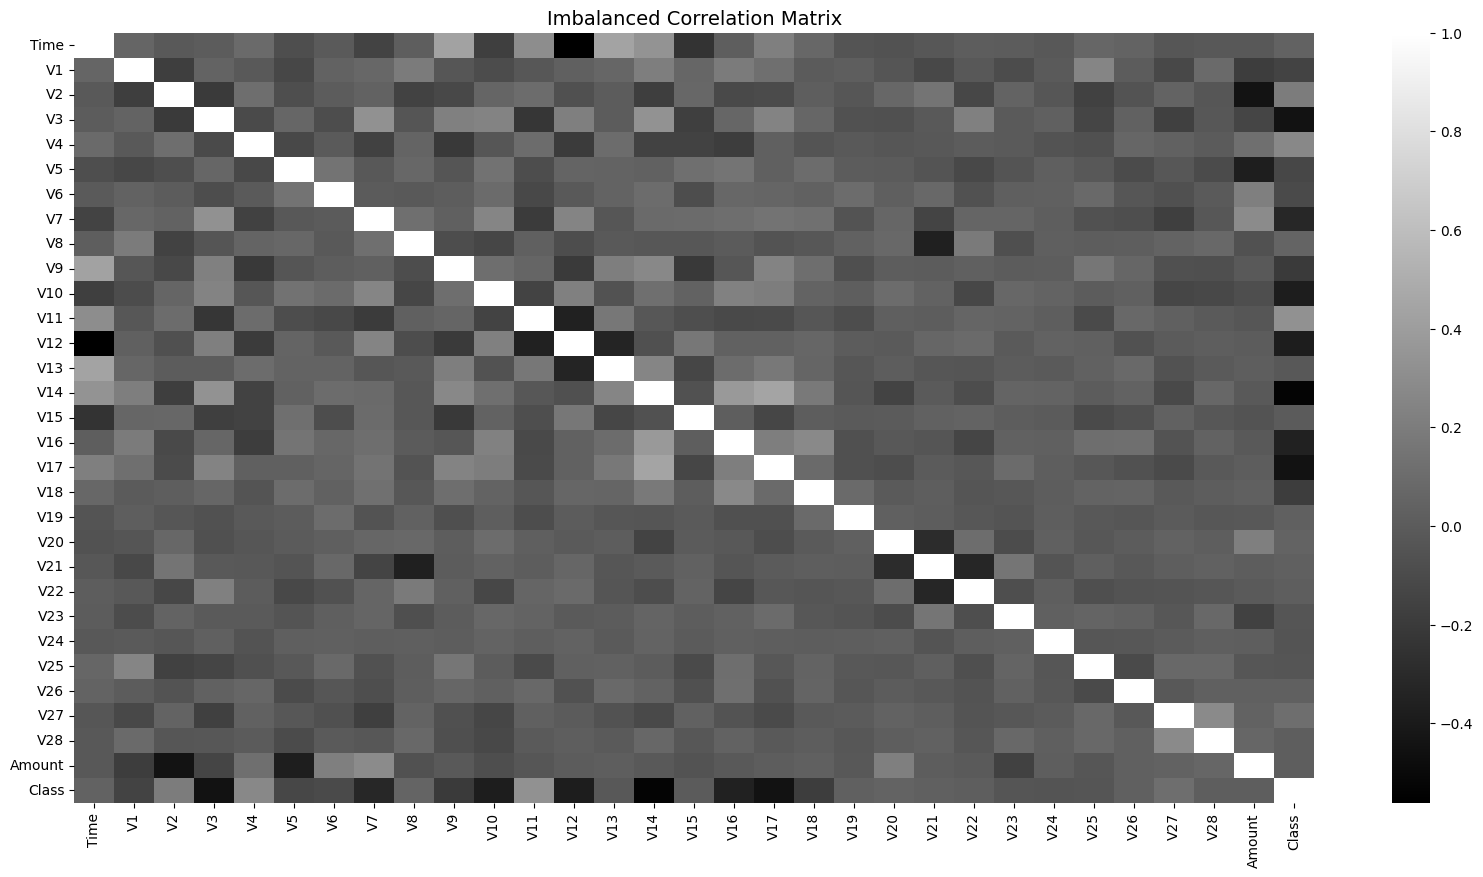

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr, cmap="gray", ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

<Axes: xlabel='Class', ylabel='count'>

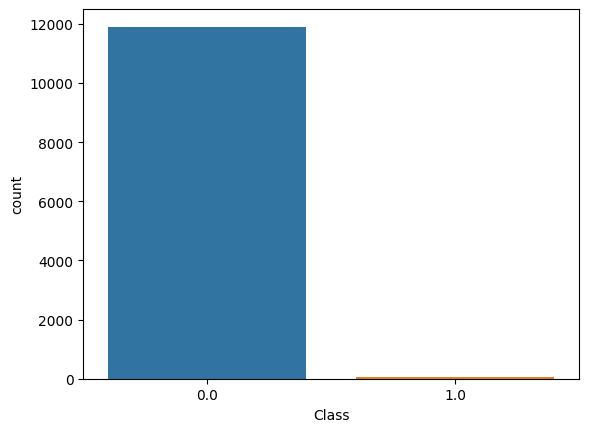

In [24]:
sns.countplot(x='Class',data=df)

In [26]:
df = df.dropna()

In [27]:
df['Class'] = df['Class'].fillna(df['Class'].mean())

In [29]:
sm = SMOTE(sampling_strategy='minority', random_state=7)
resampled_X, resampled_Y = sm.fit_resample(df.drop('Class', axis=1), df['Class'])
oversampled_df = pd.concat([pd.DataFrame(resampled_X), pd.DataFrame(resampled_Y)], axis=1)
oversampled_df.columns = df.columns
oversampled_df['Class'].value_counts()

0.0    11906
1.0    11906
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

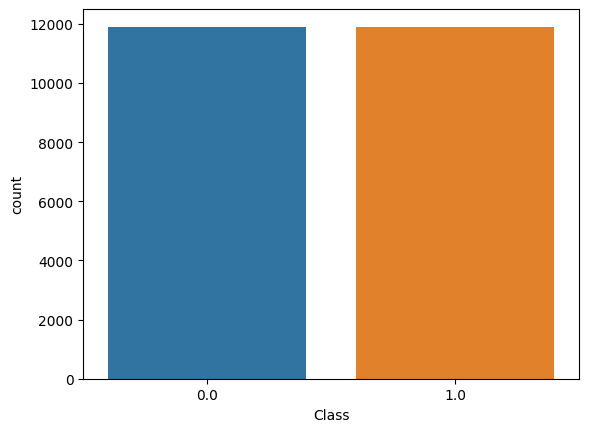

In [31]:
sns.countplot(x='Class', data=oversampled_df)

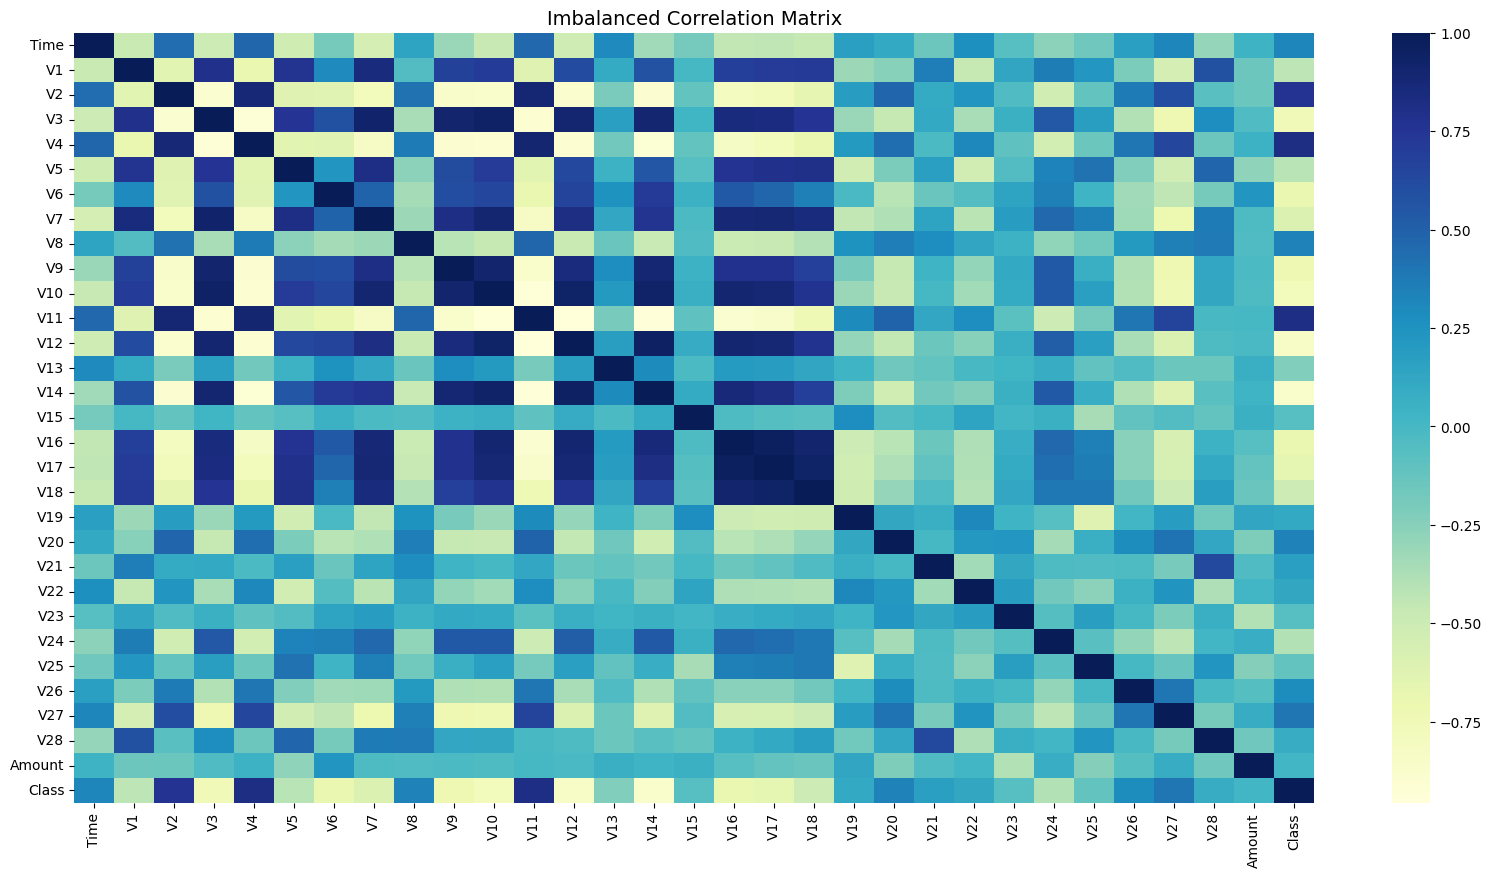

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
corr = oversampled_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [35]:
sc = StandardScaler()
X = oversampled_df.iloc[:, 1:-1].values
y = oversampled_df.iloc[:, -1].values
y = y.reshape(-1, 1)
print(X.shape, y.shape)

X = sc.fit_transform(X)
print(X[0])

(23812, 29) (23812, 1)
[ 0.13833891 -0.88123097  1.00034702 -0.52368925  0.31394073  0.88286025
  0.66315021 -0.24144938  0.50305474  0.84970111 -1.17533063  0.99004099
 -1.83115175  0.68167698  2.0240405   0.56037846  0.61673619  0.51814746
  0.3171284   0.02056351 -0.12769808  0.6143739   0.00315951  0.47716935
  0.14251844 -0.82596587 -0.2518531  -0.12717734  0.43999305]


In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0005)

In [41]:
x_features = X.shape[1]
y_features = y.shape[1]

In [43]:
i = Input(shape=(x_features,))

x = Dense(64, activation='relu')(i)
x = Dense(64, activation='relu')(x)
o = Dense(y_features, activation='sigmoid')(x)

model = Model(i,o)
model.compile(loss="binary_crossentropy", metrics=['accuracy'], optimizer=adam)
print(model.summary())
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_6 (Dense)             (None, 64)                1920      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6145 (24.00 KB)
Trainable params: 6145 (24.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [44]:
r = model.fit(x_train, y_train, epochs=100, batch_size=512, verbose=1, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/100
33/33 [==============================] - 2s 25ms/step - loss: 0.4943 - accuracy: 0.8411 - val_loss: 0.3236 - val_accuracy: 0.9332
Epoch 2/100
33/33 [==============================] - 0s 6ms/step - loss: 0.2417 - accuracy: 0.9412 - val_loss: 0.1758 - val_accuracy: 0.9478
Epoch 3/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1418 - accuracy: 0.9572 - val_loss: 0.1164 - val_accuracy: 0.9642
Epoch 4/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0987 - accuracy: 0.9688 - val_loss: 0.0858 - val_accuracy: 0.9709
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0739 - accuracy: 0.9728 - val_loss: 0.0657 - val_accuracy: 0.9742
Epoch 6/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0569 - accuracy: 0.9779 - val_loss: 0.0512 - val_accuracy: 0.9801
Epoch 7/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0450 - accuracy: 0.9831 - val_loss: 0.0410 - val_accuracy: 0.9885
Epoch 8/100


In [46]:
results = model.evaluate(x_test, y_test, batch_size=5, verbose=1)
print("Loss: %.2f" % results[0])
print("Acc: %.2f" % results[1])

1429/1429 [==============================] - 4s 2ms/step - loss: 0.0016 - accuracy: 0.9994
Loss: 0.00
Acc: 1.00


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


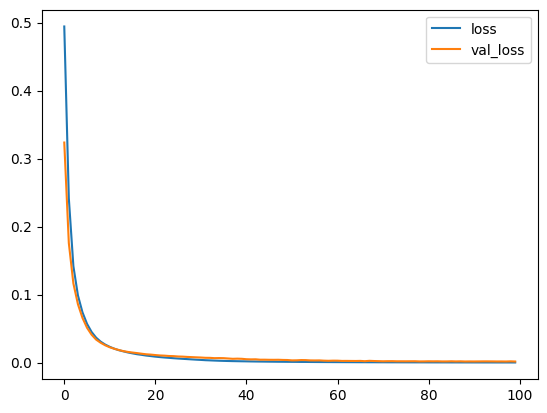

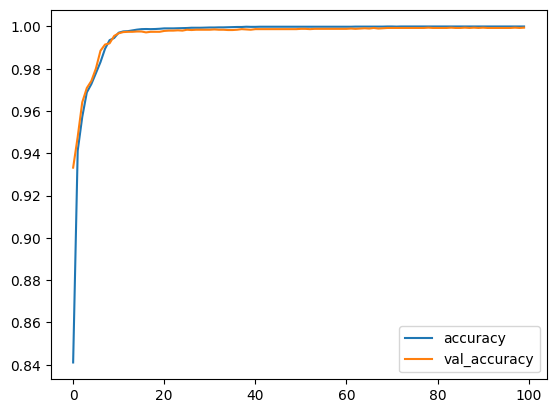

In [48]:
print(r.history.keys())
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [50]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred, decimals=0).astype(int)

224/224 [==============================] - 1s 6ms/step


In [52]:
df_pred = pd.concat([pd.DataFrame(x_test), pd.DataFrame(y_test)], axis=1)
df_pred.columns = df.drop('Time', axis=1).columns
df_pred.rename(columns={"Class":"Old_class"}, inplace=True)
df_pred['New_class'] = y_pred
cm = pd.crosstab(df_pred["New_class"], df_pred['Old_class'])
true_pos = np.sum(np.diag(cm))
false_pos = cm[0][1]
false_neg = cm[1][0]
precision = true_pos / (true_pos + false_pos) * 100
recall = true_pos / (true_pos + false_neg) * 100
f1 = 2 * (precision * recall) / (precision + recall)
print("Precision: %.3f%%" % (precision))
print("Recall: %.3f%%" % (recall))
print("F1: %.3f%%" % (f1))

Precision: 99.944%
Recall: 100.000%
F1: 99.972%


SyntaxError: invalid syntax (<ipython-input-53-f188d5ac1197>, line 1)